#### CTA and Hardship Index Score Data

Goal: see if there is a correlation between the number of stations in a community area (access to public transportation) and the hardship index score

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [87]:
# Read in the data
data = pd.read_csv('CTA_HIS.csv')

In [84]:
# Convert the data to a dataframe
df = pd.DataFrame(data)
df

,GEOID,Total Workers in Management Business Science and Arts Occupations,Total Workers in Service Occupations,Workers in Sales and Office Occupations,Workers in Natural Resources Construction and Maintenance Occupations,Workers in Production Transportation and Material Moving Occupations,Workers in Military Specific Occupations,Agriculture Forestry Fishing and Hunting and Mining,Construction,Manufacturing,...,W,Community Area,Community Area Number,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income
0,17031140701,29.4,37.1,11.4,5.9,16.3,0.0,0.0,4.8,10.1,...,1194.159624,Albany Park,14,44.8,6.4,12.6,6.6,19.3,31.7,32298
1,17031140701,29.4,37.1,11.4,5.9,16.3,0.0,0.0,4.8,10.1,...,2442.882629,Albany Park,14,44.8,6.4,12.6,6.6,19.3,31.7,32298
2,17031140800,52.3,10.6,23.2,6.7,7.3,0.0,0.8,9.1,6.8,...,878.464789,Albany Park,14,44.8,6.4,12.6,6.6,19.3,31.7,32298
3,17031620200,21.4,14.2,14.3,20.9,29.1,0.0,0.0,13.6,14.4,...,3050.192488,Archer Heights,57,62.9,11.0,10.2,8.5,29.3,40.3,21399
4,17031340500,48.1,16.2,20.3,7.0,8.4,0.0,0.0,5.5,11.3,...,2138.178404,Armour Square,34,62.9,5.7,28.3,7.1,33.6,42.7,24823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,17031242000,74.5,3.7,18.5,0.4,3.0,0.0,0.0,2.6,5.6,...,3242.370892,West Town,24,14.8,1.3,8.8,3.2,5.8,19.4,68188
119,17031243500,78.3,5.6,13.8,0.0,2.3,0.0,0.0,1.8,5.9,...,2118.286385,West Town,24,14.8,1.3,8.8,3.2,5.8,19.4,68188
120,17031842300,69.8,5.4,17.5,3.7,3.2,0.5,0.0,1.0,3.3,...,1719.516432,West Town,24,14.8,1.3,8.8,3.2,5.8,19.4,68188
121,17031420700,30.1,21.0,23.8,0.0,25.2,0.0,0.0,0.0,6.2,...,239.568075,Woodlawn,42,53.1,4.0,31.1,15.9,12.7,33.8,22457


In [41]:
# Find the number of community areas with station(s)
df['Community Area'].nunique()

41

Of the 77 community areas in Chicago, 41 have CTA station(s). 

In [42]:
# Find the value counts (number of station(s)) per community area
df['Community Area'].value_counts()

Loop                      17
Near West Side             8
Near North Side            7
Lakeview                   6
Austin                     5
Lincoln Square             4
West Town                  4
Rogers Park                4
North Lawndale             4
East Garfield Park         4
Edgewater                  4
Lower West Side            4
Logan Square               4
Grand Boulevard            4
Uptown                     3
Lincoln Park               3
Albany Park                3
Irving Park                3
Brighton Park              2
North Center               2
Armour Square              2
West Garfield Park         2
O'Hare                     2
Woodlawn                   2
Greater Grand Crossing     2
Englewood                  2
Fuller Park                2
McKinley Park              1
South Lawndale             1
Archer Heights             1
West Englewood             1
Washington Park            1
Avondale                   1
Bridgeport                 1
Roseland      

In [71]:
# Filter by community area and hardship index score
df_scores = df[['Community Area', 'Hardship Index Score']]
df_scores

,Community Area,Hardship Index Score
0,Albany Park,44.8
1,Albany Park,44.8
2,Albany Park,44.8
3,Archer Heights,62.9
4,Armour Square,62.9
...,...,...
118,West Town,14.8
119,West Town,14.8
120,West Town,14.8
121,Woodlawn,53.1


In [80]:
# Remove duplicates from above
df_scores = df_scores.sort_values('Community Area', ascending=True)
df_scores_unique = df_scores.drop_duplicates()
df_scores_unqiue

,Community Area,Hardship Index Score
0,Albany Park,44.8
3,Archer Heights,62.9
4,Armour Square,62.9
6,Austin,56.1
11,Avondale,34.1
12,Bridgeport,41.1
13,Brighton Park,65.5
15,Chatham,49.2
16,Douglas,48.3
17,East Garfield Park,65.8


In [92]:
# Read in the data
data2 = pd.read_csv('CTA_HIS_2.csv')

In [93]:
# Convert the data to a dataframe
df2 = pd.DataFrame(data2)
df2

,Community Area,Number of Stations,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income
0,Albany Park,3,44.8,6.4,12.6,6.6,19.3,31.7,32298
1,Archer Heights,1,62.9,11.0,10.2,8.5,29.3,40.3,21399
2,Armour Square,2,62.9,5.7,28.3,7.1,33.6,42.7,24823
3,Ashburn,0,47.4,4.0,13.0,10.5,17.8,38.0,25905
4,Auburn Gresham,0,53.2,1.6,24.2,16.5,15.0,42.3,20665
...,...,...,...,...,...,...,...,...,...
72,West Lawn,0,59.2,7.0,14.4,10.3,28.2,40.9,21706
73,West Pullman,0,53.5,2.9,19.4,20.7,14.1,39.1,22615
74,West Ridge,0,52.1,8.1,14.6,6.3,17.4,39.4,27671
75,West Town,4,14.8,1.3,8.8,3.2,5.8,19.4,68188


In [94]:
df2.describe()

,Number of Stations,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.597403,44.664935,3.448052,18.702597,10.544156,15.236364,35.544156,34306.779221
std,2.556003,16.474923,2.330892,10.670249,6.698674,9.161589,6.729540,19966.654661
min,0.000000,9.400000,0.100000,5.100000,0.700000,1.800000,15.900000,13982.000000
25%,0.000000,32.700000,1.700000,10.200000,5.100000,8.100000,32.800000,21385.000000
50%,1.000000,46.100000,2.800000,15.200000,8.500000,13.600000,37.700000,27871.000000
75%,2.000000,57.000000,4.400000,26.500000,15.900000,20.800000,40.200000,38888.000000
max,17.000000,76.500000,11.000000,51.900000,29.900000,41.100000,47.200000,104139.000000


In [95]:
df2_updated = df2.drop(columns=['Community Area'])
df2_updated

,Number of Stations,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income
0,3,44.8,6.4,12.6,6.6,19.3,31.7,32298
1,1,62.9,11.0,10.2,8.5,29.3,40.3,21399
2,2,62.9,5.7,28.3,7.1,33.6,42.7,24823
3,0,47.4,4.0,13.0,10.5,17.8,38.0,25905
4,0,53.2,1.6,24.2,16.5,15.0,42.3,20665
...,...,...,...,...,...,...,...,...
72,0,59.2,7.0,14.4,10.3,28.2,40.9,21706
73,0,53.5,2.9,19.4,20.7,14.1,39.1,22615
74,0,52.1,8.1,14.6,6.3,17.4,39.4,27671
75,4,14.8,1.3,8.8,3.2,5.8,19.4,68188


<Axes: >

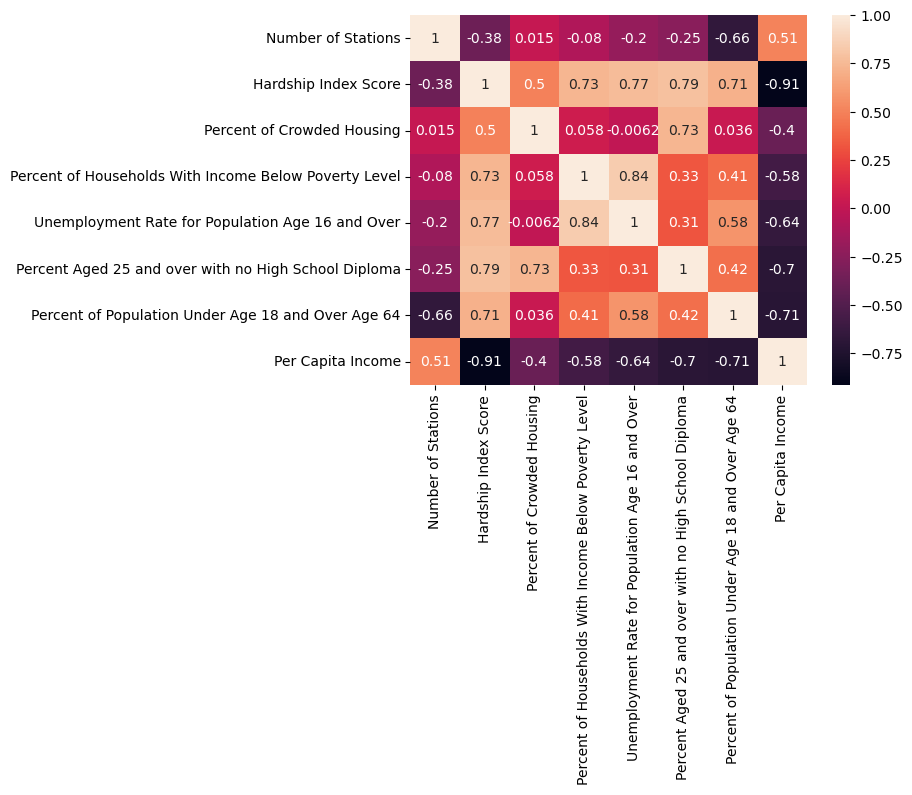

In [96]:
sns.heatmap(df2_updated.corr(), annot = True)

In [110]:
x = df2[['Percent of Crowded Housing', 'Percent of Households With Income Below Poverty Level',
       'Unemployment Rate for Population Age 16 and Over', 
       'Percent Aged 25 and over with no High School Diploma', 
       'Percent of Population Under Age 18 and Over Age 64', 'Per Capita Income']]
x

,Percent of Crowded Housing,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income
0,6.4,6.6,19.3,31.7,32298
1,11.0,8.5,29.3,40.3,21399
2,5.7,7.1,33.6,42.7,24823
3,4.0,10.5,17.8,38.0,25905
4,1.6,16.5,15.0,42.3,20665
...,...,...,...,...,...
72,7.0,10.3,28.2,40.9,21706
73,2.9,20.7,14.1,39.1,22615
74,8.1,6.3,17.4,39.4,27671
75,1.3,3.2,5.8,19.4,68188


In [99]:
y = df2['Hardship Index Score']
y

0     44.8
1     62.9
2     62.9
3     47.4
4     53.2
      ... 
72    59.2
73    53.5
74    52.1
75    14.8
76    53.1
Name: Hardship Index Score, Length: 77, dtype: float64

In [111]:
x2 = df2[['Percent of Crowded Housing',  
       'Unemployment Rate for Population Age 16 and Over', 
       'Percent Aged 25 and over with no High School Diploma', 
       'Percent of Population Under Age 18 and Over Age 64']]

# Removed 'Percent of Households With Income Below Poverty Level' and
# 'Per Capita Income'

In [112]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.25, random_state=42)

#### Linear Regression

In [113]:
# Create linear regression model 
lr = LinearRegression()
lr.fit(x_train, y_train)

prediction = lr.predict(x_test)
actual = y_test

# Determine the R^2 metric
train_score_lr = lr.score(x_train, y_train)
test_score_lr = lr.score(x_test, y_test)
print('R^2: ' + str(train_score_lr))
print('R^2: ' + str(test_score_lr))

R^2: 0.9731789426559819
R^2: 0.9492573701865549


#### Ridge Regression

In [114]:
# Create ridge regression model 
n_folds = 5
rr = linear_model.RidgeCV(alphas=np.power(10.,np.arange(0,5,0.1)), cv = n_folds)
rr.fit(x_train, y_train)

prediction = rr.predict(x_test)
actual = y_test

# Determine the R^2 metric
train_score_rr = rr.score(x_train, y_train)
test_score_rr = rr.score(x_test, y_test)
print('R^2: ' + str(train_score_rr))
print('R^2: ' + str(test_score_rr))

R^2: 0.9731776108106299
R^2: 0.9491543544218566
